Tabla 5: Flujo de protones y antiprotones respectivamente.

La función de flujo de protones $\Phi_p$ como función de la rigidez en la parte superior del AMS en unidades de $[m^{-2}sr^{-1}s^{-1}GV^{-1}]$ incluye errores debidos a la estadística ($\sigma_{\text{stat}}$), contribuciones al error sistemático del disparador y la aceptación ($\sigma_{\text{acc}}$), la función de resolución de rigidez y desdoblamiento ($\sigma_{\text{unf}}$), la escala de rigidez absoluta ($\sigma_{\text{scale}}$), y el error sistemático total ($\sigma_{\text{syst}}$). La contribución de fuentes individuales al error sistemático se suman en cuadratura para llegar al error sistemático total.

In [1]:
# Importación de librerías

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import metrics

plt.style.use("ggplot") 

%matplotlib inline

import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import iplot

In [2]:
# Primero harémos una importación del data

tab_5 = pd.read_csv(r"C:\Users\avila\OneDrive - Benemérita Universidad Autónoma de Puebla\MATLAB\Ejemplo.Python\Trabajos Uni\Datas-Frames\Trabajo set\Tesis_ROOT\table-5.csv")
display(tab_5.head())
display(tab_5.describe())

,rigidity_min GV,rigidity_max GV,proton_flux m^-2sr^-1s^-1GV^-1,proton_flux_error_statistical m^-2sr^-1s^-1GV^-1,proton_flux_error_acceptance m^-2sr^-1s^-1GV^-1,proton_flux_error_unfolding m^-2sr^-1s^-1GV^-1,proton_flux_error_rigidity_scale m^-2sr^-1s^-1GV^-1,proton_flux_error_systematic_total m^-2sr^-1s^-1GV^-1
0,1.00,1.16,824.7,0.4,9.1,8.1,3.0,12.5
1,1.16,1.33,798.6,0.3,8.7,5.5,1.8,10.5
2,1.33,1.51,760.1,0.2,8.2,3.7,1.0,9.0
3,1.51,1.71,705.5,0.2,7.6,2.5,0.5,8.0
4,1.71,1.92,639.8,0.1,6.8,1.9,0.1,7.1


,rigidity_min GV,rigidity_max GV,proton_flux m^-2sr^-1s^-1GV^-1,proton_flux_error_statistical m^-2sr^-1s^-1GV^-1,proton_flux_error_acceptance m^-2sr^-1s^-1GV^-1,proton_flux_error_unfolding m^-2sr^-1s^-1GV^-1,proton_flux_error_rigidity_scale m^-2sr^-1s^-1GV^-1,proton_flux_error_systematic_total m^-2sr^-1s^-1GV^-1
count,72.000000,72.000000,72.000000,72.000000,7.200000e+01,7.200000e+01,72.000000,72.000000
mean,108.030694,133.016806,101.415989,0.024755,1.064343e+00,4.617341e-01,0.169660,1.190236
std,196.663434,279.647326,213.595076,0.069888,2.297626e+00,1.274234e+00,0.436579,2.652600
min,1.000000,1.160000,0.000033,0.000000,3.900000e-07,9.100000e-07,0.000001,0.000002
25%,6.935000,7.592500,0.031015,0.000002,2.100000e-04,2.600000e-04,0.000173,0.000375
50%,29.950000,32.300000,1.191000,0.000065,8.000000e-03,5.500000e-03,0.005500,0.011000
75%,110.000000,118.250000,54.462500,0.001250,5.100000e-01,1.925000e-01,0.145000,0.572500
max,1130.000000,1800.000000,824.700000,0.400000,9.100000e+00,8.100000e+00,3.000000,12.500000


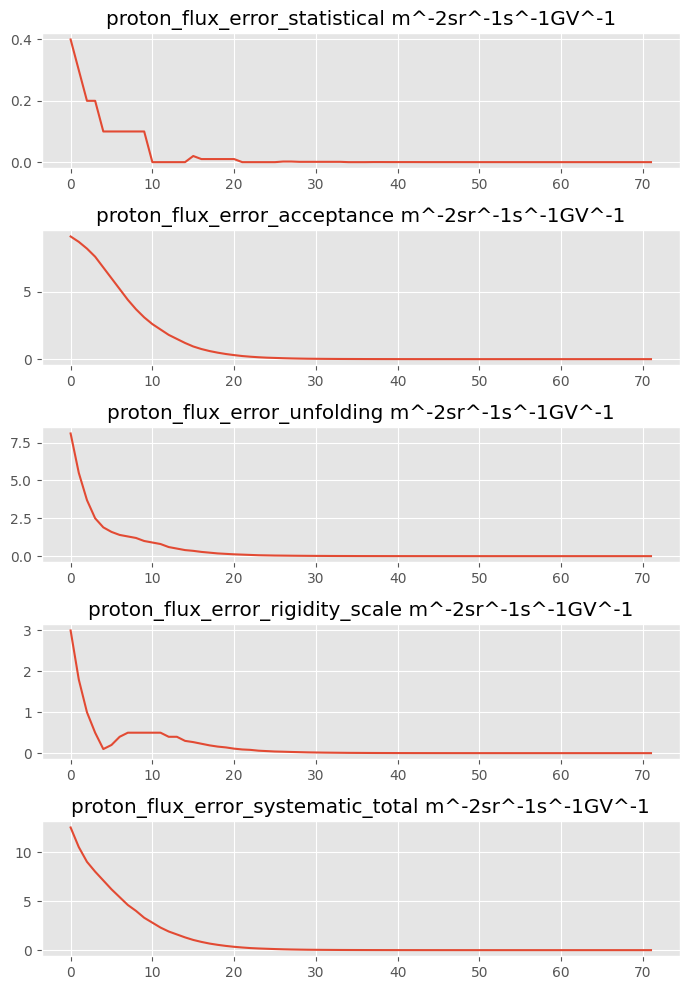

In [3]:
# Haremos gráficas de datos de errores

fig, axs = plt.subplots(5, figsize = (7, 10))

for i, col in enumerate(tab_5.columns[3:8]):
    axs[i].plot(tab_5[col])
    axs[i].set_title(col)


plt.tight_layout()


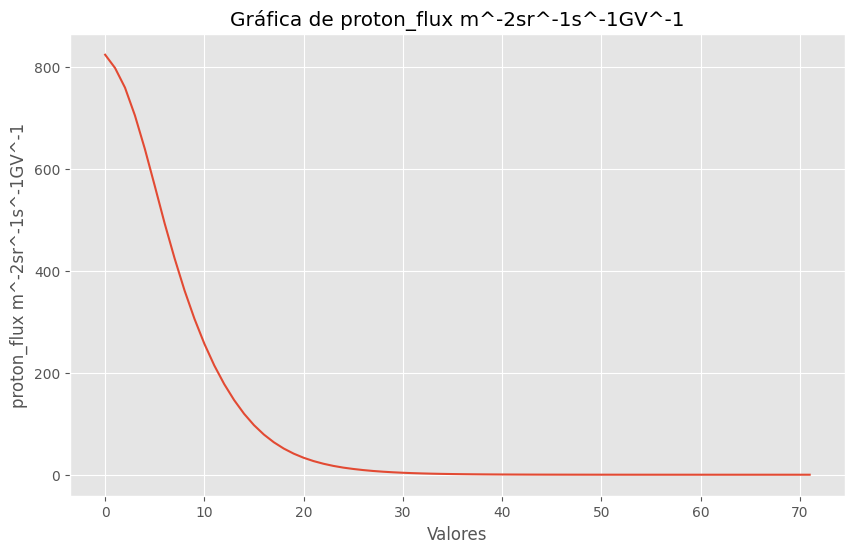

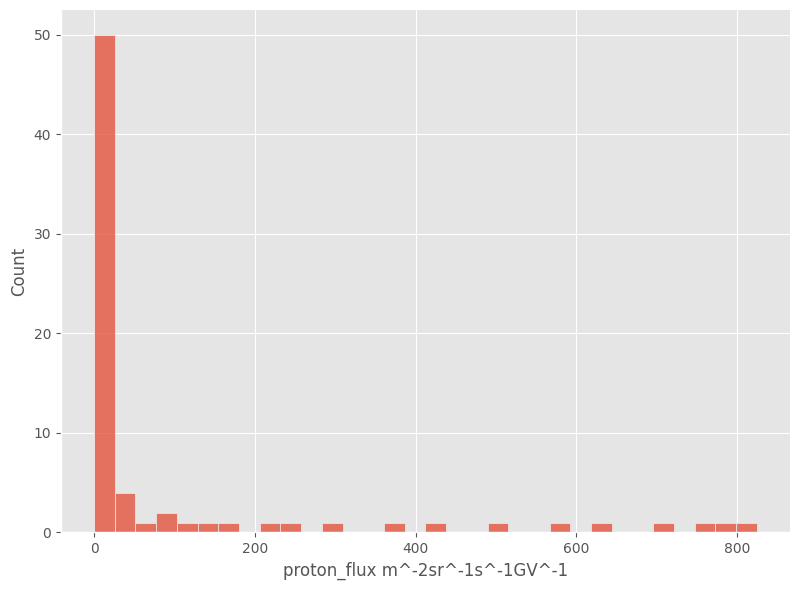

In [4]:
# Gráfica de Flujo de protones

plt.figure(figsize = (10, 6))
plt.plot(tab_5["proton_flux m^-2sr^-1s^-1GV^-1"])
plt.title(f'Gráfica de {"proton_flux m^-2sr^-1s^-1GV^-1"}')
plt.xlabel("Valores")
plt.ylabel("proton_flux m^-2sr^-1s^-1GV^-1")

# Gráfica de Histograma

sns.displot(tab_5["proton_flux m^-2sr^-1s^-1GV^-1"], height = 6, aspect = 1.35)
plt.show()


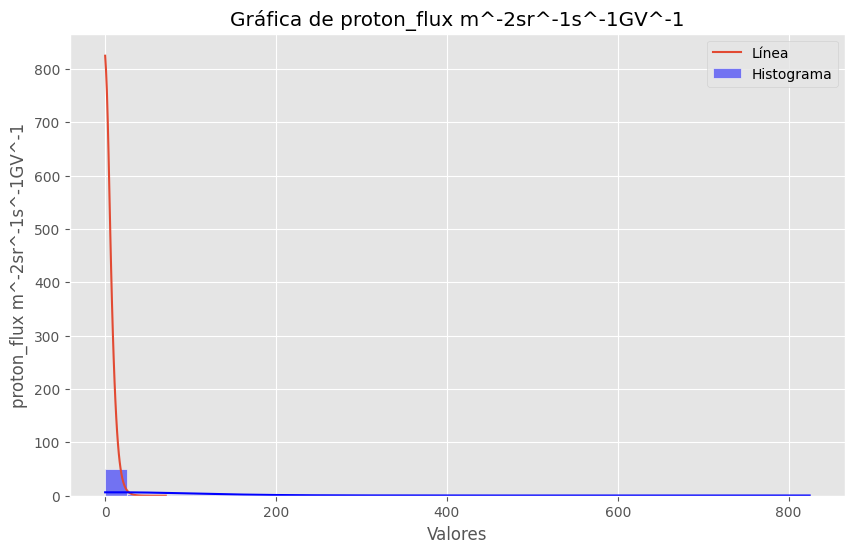

In [5]:
# Gráficas superpuestas

plt.figure(figsize = (10, 6))

# Gráfica de líneas
plt.plot(tab_5["proton_flux m^-2sr^-1s^-1GV^-1"], label = 'Línea')

# Gráfica de histograma
sns.histplot(tab_5["proton_flux m^-2sr^-1s^-1GV^-1"], kde = True, color = 'blue', label = 'Histograma')

plt.title(f'Gráfica de {"proton_flux m^-2sr^-1s^-1GV^-1"}')
plt.xlabel("Valores")
plt.ylabel("proton_flux m^-2sr^-1s^-1GV^-1")
plt.legend() 

plt.show()

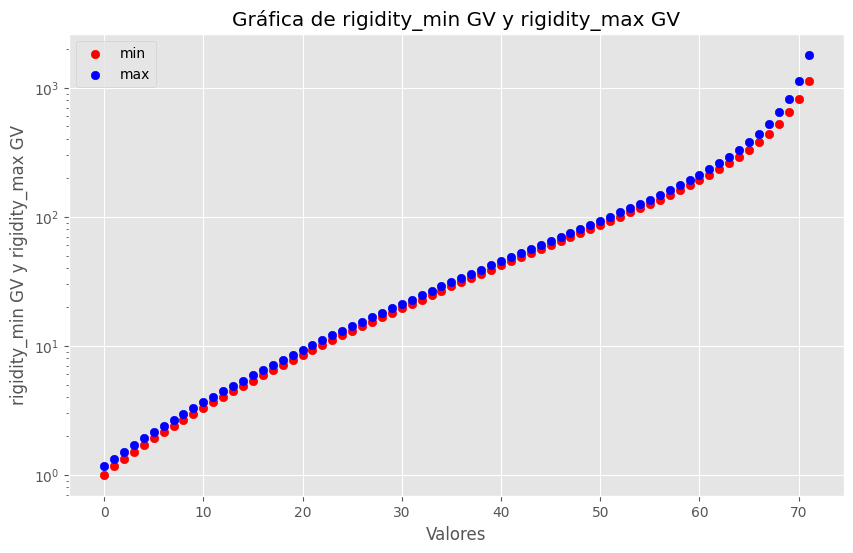

In [6]:
# Gráfica de rigidity_min GV y rigidity_max GV

plt.figure(figsize = (10, 6))
plt.yscale("log")

# Gráfica de puntos
plt.scatter(range(len(tab_5)), tab_5["rigidity_min GV"], label = "min", color = "red")
plt.scatter(range(len(tab_5)), tab_5["rigidity_max GV"], label = "max", color = "blue")

plt.title(f'Gráfica de {"rigidity_min GV"} y {"rigidity_max GV"}')
plt.xlabel("Valores")
plt.ylabel(f"{"rigidity_min GV"} y {"rigidity_max GV"}")
plt.legend() 

plt.show()

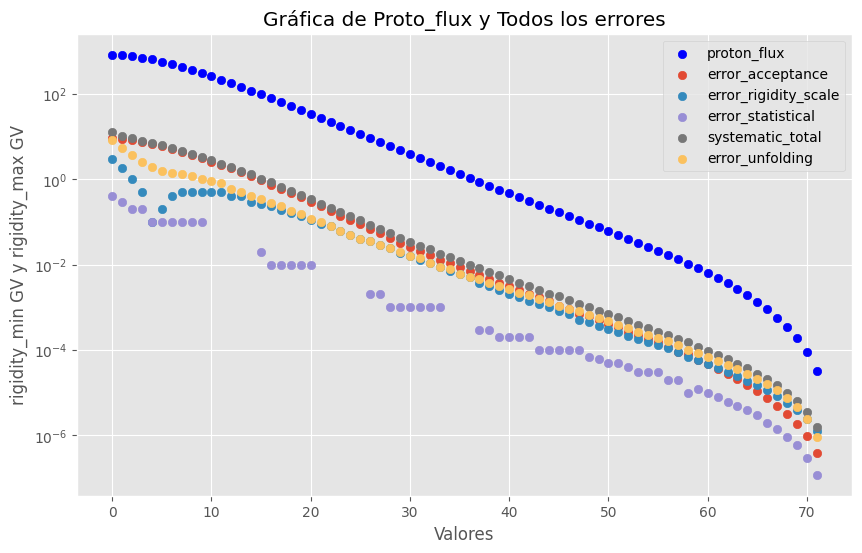

In [7]:
plt.figure(figsize = (10,6))
plt.yscale("log")

plt.scatter(range(len(tab_5)), tab_5["proton_flux m^-2sr^-1s^-1GV^-1"], label = "proton_flux", color = "Blue")
plt.scatter(range(len(tab_5)), tab_5["proton_flux_error_acceptance m^-2sr^-1s^-1GV^-1"], label = "error_acceptance")
plt.scatter(range(len(tab_5)), tab_5["proton_flux_error_rigidity_scale m^-2sr^-1s^-1GV^-1"], label = "error_rigidity_scale")
plt.scatter(range(len(tab_5)), tab_5["proton_flux_error_statistical m^-2sr^-1s^-1GV^-1"], label = "error_statistical")
plt.scatter(range(len(tab_5)), tab_5["proton_flux_error_systematic_total m^-2sr^-1s^-1GV^-1"], label = "systematic_total")
plt.scatter(range(len(tab_5)), tab_5["proton_flux_error_unfolding m^-2sr^-1s^-1GV^-1"], label = "error_unfolding")

plt.title(f'Gráfica de {"Proto_flux"} y {"Todos los errores"}')
plt.xlabel("Valores")
plt.ylabel(f"{"rigidity_min GV"} y {"rigidity_max GV"}")
plt.legend() 

plt.show()

In [8]:
# Nesesitamos sacar el valor total de errores de cada columna

total_error = np.sqrt((tab_5["proton_flux_error_acceptance m^-2sr^-1s^-1GV^-1"]).pow(2) + tab_5["proton_flux_error_rigidity_scale m^-2sr^-1s^-1GV^-1"].pow(2) + tab_5["proton_flux_error_statistical m^-2sr^-1s^-1GV^-1"].pow(2) + tab_5["proton_flux_error_systematic_total m^-2sr^-1s^-1GV^-1"].pow(2) + tab_5["proton_flux_error_unfolding m^-2sr^-1s^-1GV^-1"].pow(2))

display(total_error)

0     17.715248
1     14.816207
2     12.765970
3     11.326959
4     10.013990
        ...    
67     0.000021
68     0.000014
69     0.000009
70     0.000005
71     0.000002
Length: 72, dtype: float64

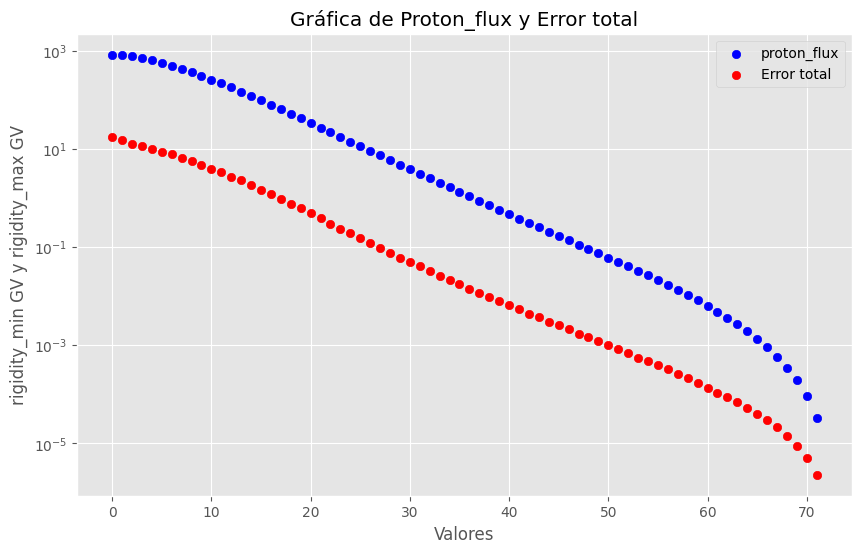

In [9]:
plt.figure(figsize = (10,6))
plt.yscale("log")

plt.scatter(range(len(tab_5)), tab_5["proton_flux m^-2sr^-1s^-1GV^-1"], label = "proton_flux", color = "Blue")
plt.scatter(range(len(total_error)), total_error, label = "Error total", color = "r" )

plt.title(f'Gráfica de {"Proton_flux"} y {"Error total"}')
plt.xlabel("Valores")
plt.ylabel(f"{"rigidity_min GV"} y {"rigidity_max GV"}")
plt.legend() 

plt.show()

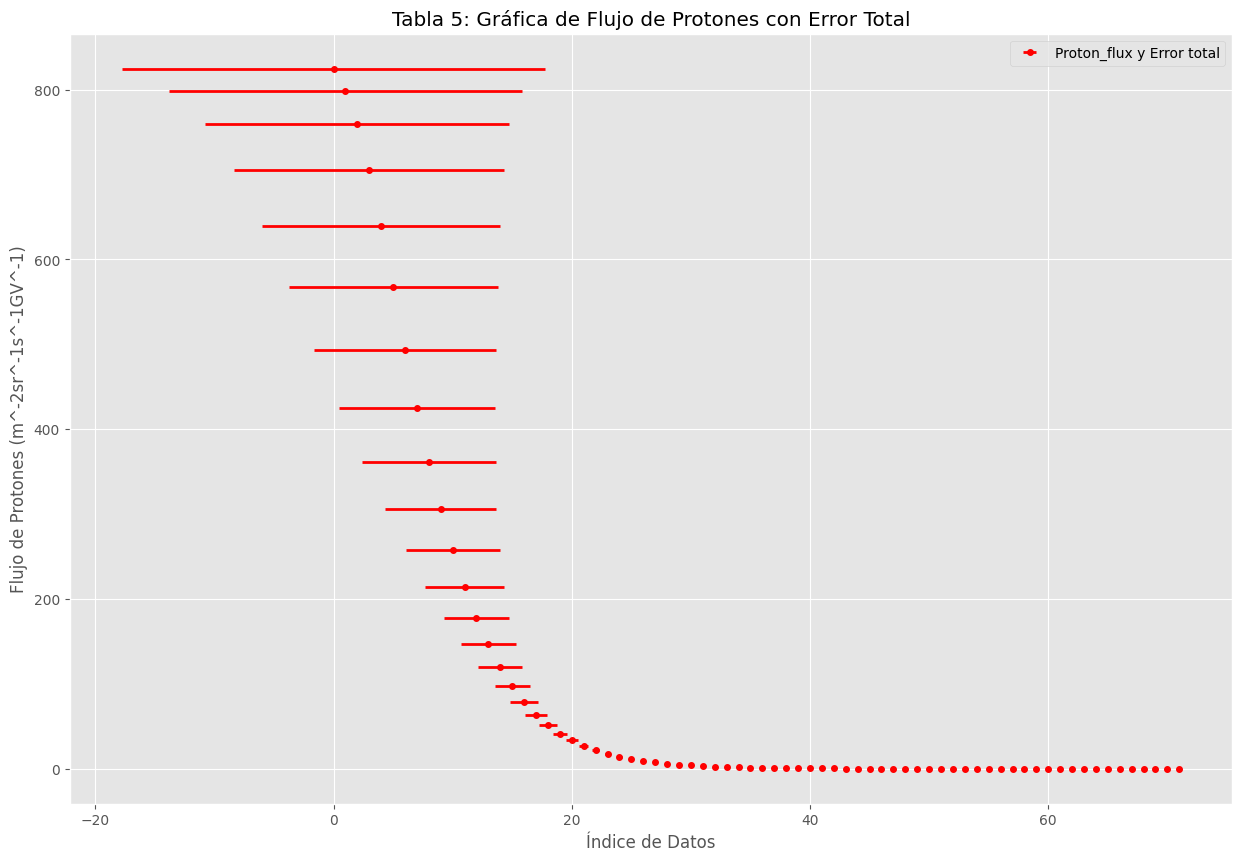

In [10]:
# Graficar de datos con sus barras de error
# Tabla 5 

x = range(len(tab_5["proton_flux m^-2sr^-1s^-1GV^-1"]))
plt.figure(figsize = (15, 10))

#plt.yscale("log")

plt.errorbar(x, tab_5["proton_flux m^-2sr^-1s^-1GV^-1"], xerr = total_error, fmt = "o", label = "Proton_flux y Error total", elinewidth = 2, markersize = 4, color = "r")

plt.xlabel('Índice de Datos')
plt.ylabel('Flujo de Protones (m^-2sr^-1s^-1GV^-1)')
plt.title('Tabla 5: Gráfica de Flujo de Protones con Error Total')

plt.legend()

plt.show()

Tabla 6: 

El flujo de antiprotones $\bar{p}$, $\Phi_{\bar{p}}$, en unidades de $[m^2 sr s GV]^{-1}$ y la relación de flujo (antiprotón/protón) $\Phi_{\bar{p}} / \Phi_p$ como función de la rigidez absoluta en la parte superior del AMS. $\tilde{N}_{\bar{p}}$ es el número de antiprotones observados en cada intervalo de rigidez redondeado al entero más cercano. $\sigma_{stat}$ y $\sigma_{syst}$ son los errores estadísticos y sistemáticos respectivos.





In [11]:
tab_6 = pd.read_csv(r"C:\Users\avila\OneDrive - Benemérita Universidad Autónoma de Puebla\MATLAB\Ejemplo.Python\Trabajos Uni\Datas-Frames\Trabajo set\Tesis_ROOT\table-6.csv")

display(tab_6.head())
display(tab_6.describe())

,rigidity_min GV,rigidity_max GV,number_of_events,antiproton_flux m^-2sr^-1s^-1GV^-1,antiproton_flux_error_statistical m^-2sr^-1s^-1GV^-1,antiproton_flux_error_systematic_total m^-2sr^-1s^-1GV^-1,antiproton_to_proton_ratio,antiproton_to_proton_ratio_error_statistical,antiproton_to_proton_ratio_error_systematic_total
0,1.00,1.16,69,0.00641,0.00085,0.00057,0.000008,1.040000e-06,5.900000e-07
1,1.16,1.33,159,0.00778,0.00064,0.00061,0.000010,8.000000e-07,6.300000e-07
2,1.33,1.51,324,0.00929,0.00060,0.00063,0.000012,8.000000e-07,7.000000e-07
3,1.51,1.71,1027,0.01110,0.00040,0.00070,0.000016,6.000000e-07,8.000000e-07
4,1.71,1.92,1609,0.01250,0.00040,0.00070,0.000020,6.000000e-07,1.000000e-06


,rigidity_min GV,rigidity_max GV,number_of_events,antiproton_flux m^-2sr^-1s^-1GV^-1,antiproton_flux_error_statistical m^-2sr^-1s^-1GV^-1,antiproton_flux_error_systematic_total m^-2sr^-1s^-1GV^-1,antiproton_to_proton_ratio,antiproton_to_proton_ratio_error_statistical,antiproton_to_proton_ratio_error_systematic_total
count,58.00000,58.000000,58.000000,5.800000e+01,5.800000e+01,5.800000e+01,58.000000,5.800000e+01,5.800000e+01
mean,43.37431,52.408793,9585.517241,4.649196e-03,1.123914e-04,2.299939e-04,0.000146,4.121379e-06,6.102069e-06
std,65.19094,90.580545,10242.401494,5.817599e-03,1.900614e-04,2.997570e-04,0.000065,7.113154e-06,6.195599e-06
min,1.00000,1.160000,63.000000,1.330000e-07,3.600000e-08,3.900000e-08,0.000008,6.000000e-07,5.900000e-07
25%,5.00250,5.502500,1458.750000,5.212500e-05,1.150000e-06,1.450000e-06,0.000106,1.000000e-06,4.325000e-06
50%,17.30000,18.750000,5421.500000,1.056000e-03,8.500000e-06,3.600000e-05,0.000178,1.350000e-06,5.000000e-06
75%,51.27500,55.125000,12946.500000,9.097500e-03,1.750000e-04,5.000000e-04,0.000193,4.750000e-06,6.000000e-06
max,330.00000,525.000000,38386.000000,1.670000e-02,8.500000e-04,8.000000e-04,0.000208,4.000000e-05,4.400000e-05


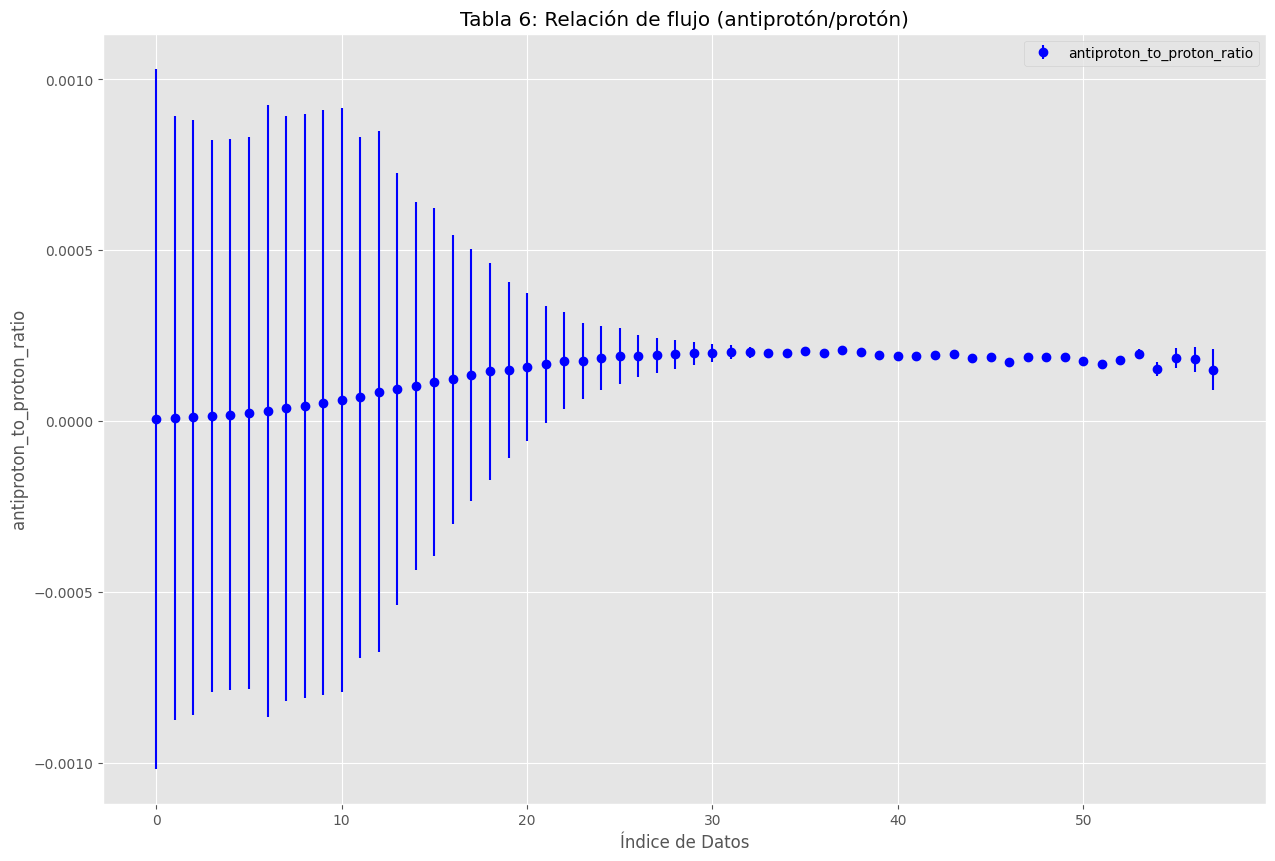

In [12]:
# Primero creamos los valores de errores totales

total_error_tab_6 = np.sqrt(tab_6["antiproton_to_proton_ratio_error_systematic_total"].pow(2) + tab_6["antiproton_to_proton_ratio_error_statistical"].pow(2) + tab_6["antiproton_flux_error_systematic_total m^-2sr^-1s^-1GV^-1"].pow(2) + tab_6["antiproton_flux_error_statistical m^-2sr^-1s^-1GV^-1"].pow(2))

# Creación de la gráfica

x_t6 = range(len(tab_6["antiproton_to_proton_ratio"]))

plt.figure(figsize = (15,10))
#plt.xscale("log")

plt.errorbar(x_t6, tab_6["antiproton_to_proton_ratio"], yerr = total_error_tab_6, fmt = "o", label = "antiproton_to_proton_ratio", color = "b")
plt.xlabel('Índice de Datos')
plt.ylabel('antiproton_to_proton_ratio')
plt.title('Tabla 6: Relación de flujo (antiprotón/protón)')

plt.legend()

plt.show()


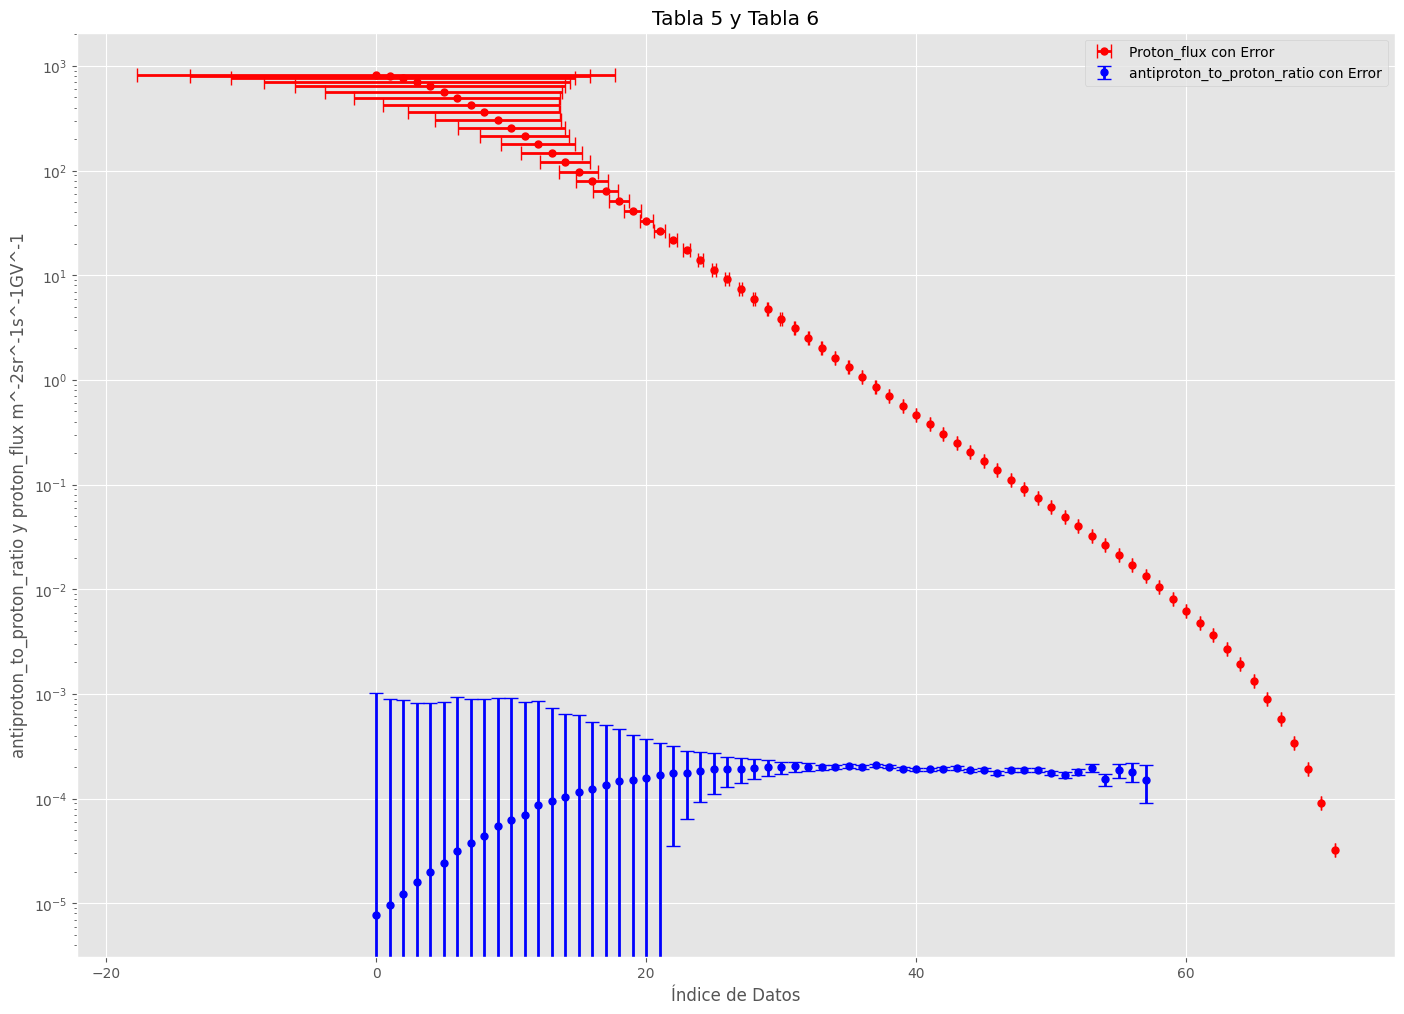

In [13]:
# Hacemos gráfica de las dos tablas

plt.figure(figsize = (17,12))
plt.yscale("log")
#plt.xscale("log")

plt.errorbar(x, tab_5["proton_flux m^-2sr^-1s^-1GV^-1"], xerr = total_error, fmt = "o", label = "Proton_flux con Error", elinewidth = 2, markersize = 5, color = "r", capsize = 5)
plt.errorbar(x_t6, tab_6["antiproton_to_proton_ratio"], yerr = total_error_tab_6, fmt = "o", label = "antiproton_to_proton_ratio con Error", elinewidth = 2, markersize = 5 ,color = "b", capsize = 5)

plt.xlabel('Índice de Datos')
plt.ylabel('antiproton_to_proton_ratio y proton_flux m^-2sr^-1s^-1GV^-1')
plt.title('Tabla 5 y Tabla 6')
plt.legend()

plt.show()

In [14]:
x = list(x)  
x_t6 = list(x_t6)  #

trace1 = go.Scatter(
    x = x,
    y = tab_5["proton_flux m^-2sr^-1s^-1GV^-1"],
    mode = 'markers',
    error_x = dict(type = 'data', array = total_error),
    name = 'Proton_flux con Error',
    marker = dict(color = 'red'),
    error_y = dict(
        type = 'data', 
        array = total_error, 
        visible = True
    )
)

trace2 = go.Scatter(
    x = x_t6,
    y = tab_6["antiproton_to_proton_ratio"],
    mode = 'markers',
    name = 'antiproton_to_proton_ratio con Error',
    marker = dict(color = 'blue'),
    error_y = dict(
        type = 'data', 
        array = total_error_tab_6,
        visible = True
    )
)

data = [trace1, trace2]

layout = go.Layout(
    title = 'Gráfica intercativa de Relación de flujo (antiprotón/protón) y Proton_Flux',
    xaxis = dict(title = 'Índice de Datos'),
    yaxis = dict(
        title = 'Flujo [Escala Log]',
        type = 'log', 
        autorange = True
    ),
    legend = dict(orientation = "h"),
    margin = dict(l = 25, r = 25, t = 25, b = 25), 
)

fig = go.Figure(data = data, layout = layout)
iplot(fig)